icuA


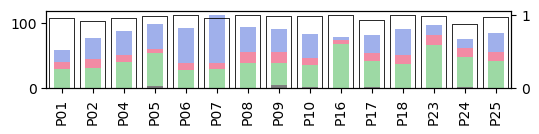

icuB


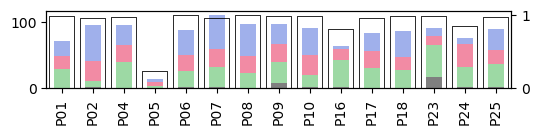

icuaA


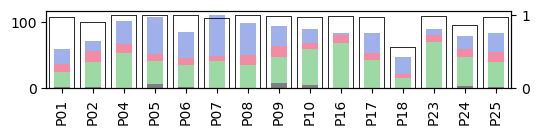

icuaB


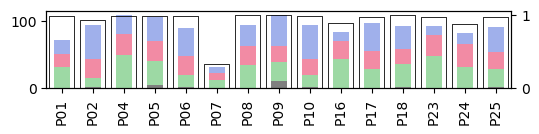

In [47]:
# Get fixation times for each participant on each task
import numpy as np
import pandas as pd
import icua_analysis as ia
import matplotlib.pyplot as plt
import itertools

bins = 50

df = pd.DataFrame(columns=['participant', 'trial', 'task', 'total_fixation', 'event_count'])

for trial, par_data in ia.load_tabularised().has_eyetracking().groupby_trial():
    for par, data in par_data.items():
        intervals = ia.get_fixation_intervals(data)
        event_count = data['eyetracking_data'].shape[0]
        for task in ia.TASKS + ['N']:
            tintervals = intervals[intervals['task'] == task]    
            df.loc[len(df)] = [par, trial, task, (tintervals['t2'] - tintervals['t1']).sum(), event_count]
            
for trial, trial_df in df.groupby('trial'):
    print(trial)
    pivot_df = trial_df.pivot(index='participant', columns='task', values='total_fixation')
    pivot_df = pivot_df[['N', 'F', 'S', 'T']] # order for stacking bar chart
    # Plotting
    colors = {task:ia.get_task_properties(task)['color'] for task in df['task'].unique()}
    pivot_df.plot(kind='bar', stacked=True, figsize=(6, 1), color=colors, alpha=0.5, legend=False)
    plt.gca().set_xlabel(None)

    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncols=4)
    #plt.suptitle(trial)
    # plot count of eyetracking events, if the eyetracker bugs out the this will be shown here as relatively box size
    #plt.gca().set_ylabel('time (s)')
    normalised_duration = (trial_df['event_count'] / trial_df['event_count'].max()) #  * pivot_df.sum(axis=1).max()
    
    # Create a secondary axis
    ax2 = plt.gca().twinx()
    ax2.set_ylim(0,1.05)
    ax2.set_yticks([0,1])
    ax2.bar(trial_df['participant'],  normalised_duration, fill=False, alpha=0.5, linewidth=0.5, edgecolor="black", label="duration")
    
    plt.savefig(f'../result/fixation_duration_{trial}.png', bbox_inches="tight", dpi=300)
    plt.show() 

easy


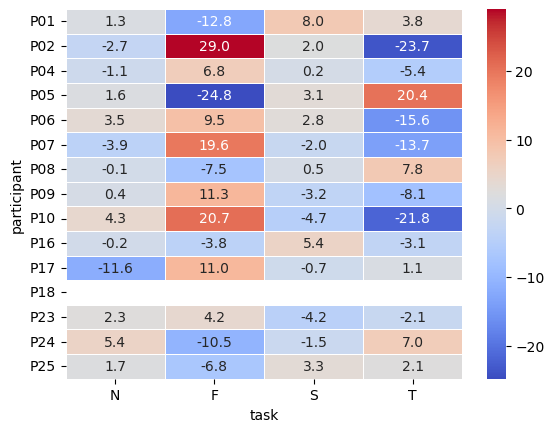

15
task             N      F      S      T
participant                            
P01           True  False   True   True
P02          False   True   True  False
P04          False   True   True  False
P05           True  False   True   True
P06           True   True   True  False
P07          False   True  False  False
P08          False  False   True   True
P09           True   True  False  False
P10           True   True  False  False
P16          False  False   True  False
P17          False   True  False   True
P18          False  False  False  False
P23           True   True  False  False
P24           True  False  False   True
P25           True  False   True   True
\begin{tabular}{rrrr}
\toprule
 N &  F &  S &  T \\
\midrule
 8 &  8 &  8 &  6 \\
\bottomrule
\end{tabular}

hard


/tmp/ipykernel_23726/348890758.py:40: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print((fixation_difference > 0).sum().to_frame().T[['N', 'F', 'S', 'T']].to_latex(index=False))


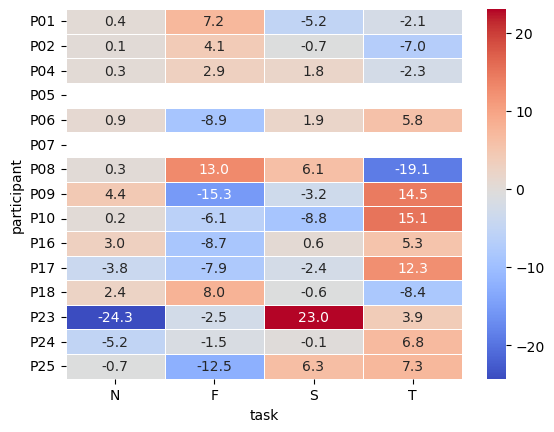

15
task             N      F      S      T
participant                            
P01           True   True  False  False
P02           True   True  False  False
P04           True   True   True  False
P05          False  False  False  False
P06           True  False   True   True
P07          False  False  False  False
P08           True   True   True  False
P09           True  False  False   True
P10           True  False  False   True
P16           True  False   True   True
P17          False  False  False   True
P18           True   True  False  False
P23          False  False   True   True
P24          False  False  False   True
P25          False  False   True   True
\begin{tabular}{rrrr}
\toprule
 N &  F &  S &  T \\
\midrule
 9 &  5 &  6 &  8 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_23726/348890758.py:40: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print((fixation_difference > 0).sum().to_frame().T[['N', 'F', 'S', 'T']].to_latex(index=False))


In [59]:
# check where participants are looking, do they spent longer look at S and F when guidance is present?
import numpy as np
import pandas as pd
import icua_analysis as ia
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

bins = 50
df = pd.DataFrame(columns=['participant', 'trial', 'task', 'total_looking', 'event_count'])

for trial, par_data in ia.load_tabularised().has_eyetracking().groupby_trial():
    for par, data in par_data.items():
        intervals = ia.get_looking_intervals(data)
        event_count = data['eyetracking_data'].shape[0]
        for task in ia.TASKS + ['N']:
            tintervals = intervals[intervals['task'] == task]    
            df.loc[len(df)] = [par, trial, task, (tintervals['t2'] - tintervals['t1']).sum(), event_count]
            
df = ia.assign_difficulty(df) # add a difficulty column
df = ia.assign_guidance(df) # add a guidance column

# remove outliers (p05 A p18 A and p07 B), comment out to see these values
df = df[df['event_count'] > 8000]

for difficulty, data in df.groupby('difficulty'):
    df_w = data[data['guidance'] == True].pivot(index='participant', columns='task', values='total_looking')[['N', 'F', 'S', 'T']]
    df_wo = data[data['guidance'] == False].pivot(index='participant', columns='task', values='total_looking')[['N', 'F', 'S', 'T']]
    # if positive then participant spent more time looking on the task when guidance is present
    # we might expect this to be the case for S and F with some cost to T as T never has guidance present.
    fixation_difference = df_w - df_wo
    #fixation_difference['dif_check'] = fixation_difference.sum(1) # this should be equal to below! (sanity check)
    #fixation_difference['dif'] = df_w.sum(1) - df_wo.sum(1)
    
    sns.heatmap(fixation_difference, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".1f")
    print(difficulty)
    plt.show()
    print(len(fixation_difference))
    print((fixation_difference > 0))
    print((fixation_difference > 0).sum().to_frame().T[['N', 'F', 'S', 'T']].to_latex(index=False))
    
    
    
    
    
    




In [67]:
# check where participants are looking, do they spent longer look at S and F when guidance is present?
# check if the time spent looking at F and S correlates with the amount of guidance given on these tasks?
# it should do, but it doesnt tell us much about their causal relationship.

import numpy as np
import pandas as pd
import icua_analysis as ia
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

bins = 50
df = pd.DataFrame(columns=['participant', 'trial', 'task', 'total_looking', 'event_count'])

for trial, par_data in ia.load_tabularised().has_eyetracking().groupby_trial():
    for par, data in par_data.items():
        intervals = ia.get_looking_intervals(data)
        event_count = data['eyetracking_data'].shape[0]
        for task in ia.TASKS + ['N']:
            tintervals = intervals[intervals['task'] == task]    
            df.loc[len(df)] = [par, trial, task, (tintervals['t2'] - tintervals['t1']).sum(), event_count]
            
df = ia.assign_difficulty(df) # add a difficulty column
df = ia.assign_guidance(df) # add a guidance column
# remove outliers (p18 A and p05 B, p07 B), comment out to see these values
df = df[df['event_count'] > 8000]

# add guidance stats
df = pd.merge(df, ia.get_guidance_stats(), on=['participant', 'trial', 'task'])

for trial, group in df.groupby('trial'):
    print(trial)
    corr_cumu = group.groupby('task')[['total_looking', 'guidance_cumulative']].corr().unstack().iloc[:, 1]
    corr_count = group.groupby('task')[['total_looking', 'guidance_count']].corr().unstack().iloc[:, 1]

    print(corr_cumu)
    print(corr_count)

icuaA
task
F   -0.070799
S    0.004033
T         NaN
Name: (total_looking, guidance_cumulative), dtype: float64
task
F    0.024515
S    0.158677
T         NaN
Name: (total_looking, guidance_count), dtype: float64
icuaB
task
F   -0.498407
S   -0.400357
T         NaN
Name: (total_looking, guidance_cumulative), dtype: float64
task
F   -0.363460
S   -0.375276
T         NaN
Name: (total_looking, guidance_count), dtype: float64


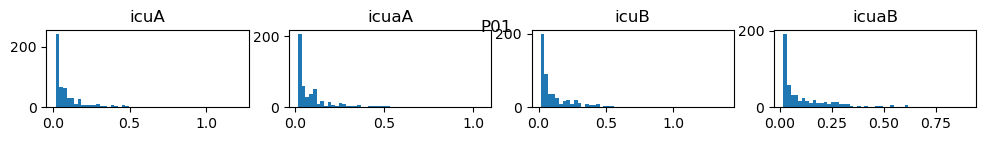

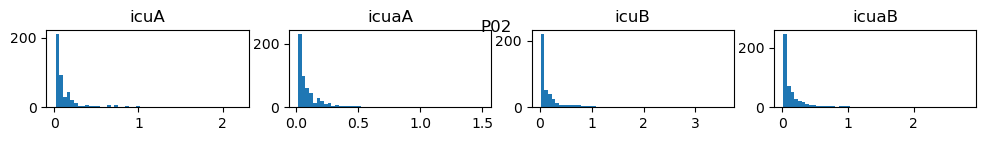

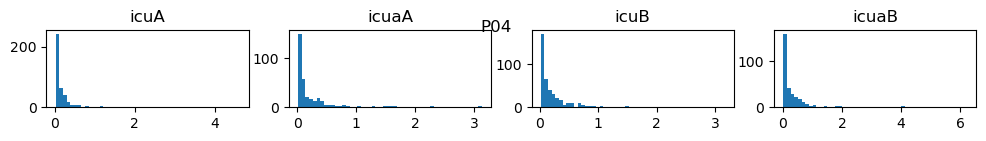

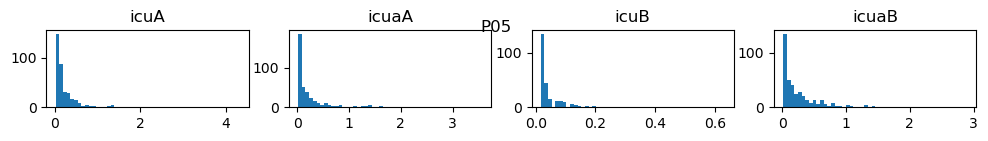

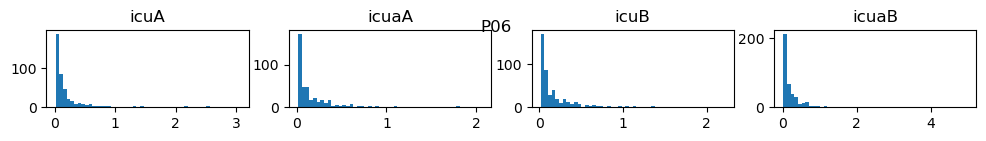

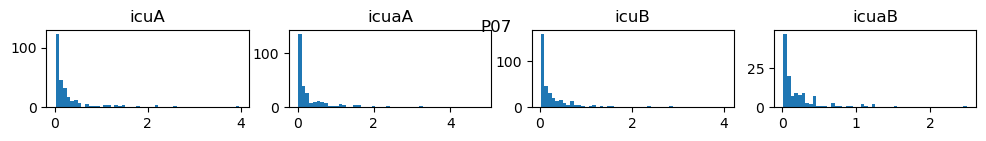

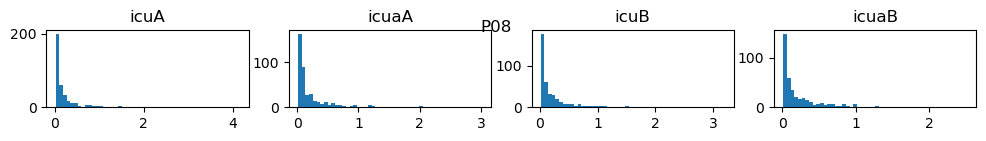

KeyboardInterrupt: 

In [1]:
# Plot distibutions of "fixation" interval lengths. 
import numpy as np
import pandas as pd
import icua_analysis as ia
import matplotlib.pyplot as plt
import itertools

bins = 50
for par, trial_data in ia.load_tabularised().has_eyetracking().groupby_participant():
    fixation = {trial : ia.get_fixation_intervals(data) for trial, data in trial_data.items()}
    fixation = {trial : (data['t2'] - data['t1']) for trial, data in fixation.items()}
    fig, axes = plt.subplots(figsize=(12,1), ncols=4, nrows=1)
    for ax, (trial, dif) in zip(axes.ravel(), fixation.items()):
        ax.hist(dif, bins=50)
        ax.set_title(trial)
    fig.suptitle(par)
    plt.show()

In [ ]:
# DEBUG - checking intervals
import numpy as np
import pandas as pd
import icua_analysis as ia
import matplotlib.pyplot as plt
import itertools

bins = 50
dataset = {key:data for key,data in ia.load_tabularised().has_eyetracking()}
data = dataset[('P16', 'icuB')]
intervals = ia.get_fixation_intervals(data)
ia.plot_intervals(intervals[['t1', 't2']].to_numpy())